In [ ]:
# Department: ESTSOFT
# Class: AI Modelling
# Category: Machine learning
# Title: Antarctic glacier analysis
# Contributors: Kimm Soo Min
# Last modified date: 12/05/25

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

In [10]:
path_1 = "../data/output/gan/image_teaching"
path_2 = "../data/output/gan/image_autoregressive"


In [11]:
def grab_images(folder):
	return sorted([os.path.join(folder, file) for file in os.listdir(folder) if file.endswith('.png')])

In [12]:
img_paths = grab_images(path_1)
pred_1_paths = sorted([path for path in img_paths if '/pred_' in path])
true_paths = sorted([path for path in img_paths if '/true_' in path])
pred_2_paths = grab_images(path_2)

In [13]:
# Read the images
img_orig = [Image.open(path) for path in true_paths]
img_teaching = [Image.open(path) for path in pred_1_paths]
img_autoregressive = [Image.open(path) for path in pred_2_paths]

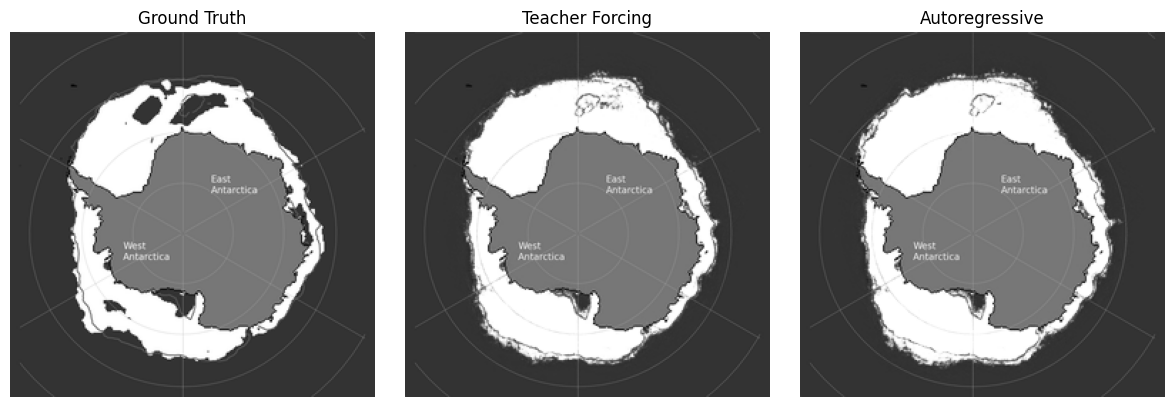

In [6]:
idx = 23
plt.figure(figsize=(12, 4))

# Ground Truth
plt.subplot(1, 3, 1)
plt.imshow(img_orig[idx], cmap='gray')
plt.title("Ground Truth")
plt.axis('off')

# Teacher Forcing
plt.subplot(1, 3, 2)
plt.imshow(img_teaching[idx], cmap='gray')
plt.title("Teacher Forcing")
plt.axis('off')

# Autoregressive
plt.subplot(1, 3, 3)
plt.imshow(img_autoregressive[idx], cmap='gray')
plt.title("Autoregressive")
plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
# Convert PIL image to numpy array
def to_array(img):
    return np.array(img).astype(np.float32) / 255.0  # Normalize to [0,1]

mse_teaching = []
mse_autoregressive = []
ssim_teaching = []
ssim_autoregressive = []
psnr_teaching = []
psnr_autoregressive = []
for idx in range(len(img_autoregressive)):
    img_1 = to_array(img_orig[idx])
    img_2 = to_array(img_teaching[idx])
    img_3 = to_array(img_autoregressive[idx])

	# Compute MSE
    mse_teaching.append(mean_squared_error(img_1.flatten(), img_2.flatten()))
    mse_autoregressive.append(mean_squared_error(img_1.flatten(), img_3.flatten()))
    
	# Compute SSIM
    ssim_teaching.append(ssim(img_1, img_2, data_range=1.0, channel_axis=-1 if img_1.ndim == 3 else None))
    ssim_autoregressive.append(ssim(img_1, img_3, data_range=1.0, channel_axis=-1 if img_1.ndim == 3 else None))

	# Compute PSNR
    psnr_teaching.append(psnr(img_1, img_2, data_range=1.0))
    psnr_autoregressive.append(psnr(img_1, img_3, data_range=1.0))

#print(f"MSE (Teacher Forcing): {np.mean(mse_teaching):.6f}")
print(f"MSE (Autoregressive): {np.mean(mse_autoregressive):.6f}")
#print(f"SSIM (Teacher Forcing): {np.mean(ssim_teaching):.6f}")
print(f"SSIM (Autoregressive): {np.mean(ssim_autoregressive):.6f}")
#print(f"PSNR (Teacher Forcing): {np.mean(psnr_teaching):.2f} dB")
print(f"PSNR (Autoregressive): {np.mean(psnr_autoregressive):.2f} dB")

MSE (Autoregressive): 0.023289
SSIM (Autoregressive): 0.881794
PSNR (Autoregressive): 16.61 dB
